In [1]:
import glob
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
# Specify correct location where datasets are stored
path = r'C:\Users\I539797\Documents\GitHub\UberMovementDataDownloadBot\Datasets\Los Angeles'

In [3]:
# Merge/Concatenate all datasets into one
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join(r'C:\Users\I539797\Documents\GitHub\UberMovementDataDownloadBot\Datasets\Los Angeles', "*.csv"))))

In [4]:
df.head(10)

Origin Movement ID     Origin Display Name Destination Movement ID  \
0               1536  Traffic Zone 222420000                      83   
1               1536  Traffic Zone 222420000                      95   
2               1536  Traffic Zone 222420000                      98   
3               1536  Traffic Zone 222420000                     107   
4               1536  Traffic Zone 222420000                     123   
5               1536  Traffic Zone 222420000                     129   
6               1536  Traffic Zone 222420000                     133   
7               1536  Traffic Zone 222420000                     140   
8               1536  Traffic Zone 222420000                     147   
9               1536  Traffic Zone 222420000                     148   

  Destination Display Name                                     Date Range  \
0   Traffic Zone 213930100  2/2/2016 - 2/2/2016, Every day, Daily Average   
1   Traffic Zone 213930200  2/2/2016 - 2/2/2016, Every day, Daily Average   
2   Traffic Zone 213930300  2/2/2016 - 2/2/2016, Every day, Daily Average   
3   Traffic Zone 213920000  2/2/2016 - 2/2/2016, Every day, Daily Average   
4   Traffic Zone 213900000  2/2/2016 - 2/2/2016, Every day, Daily Average   
5   Traffic Zone 214150000  2/2/2016 - 2/2/2016, Every day, Daily Average   
6   Traffic Zone 214140000  2/2/2016 - 2/2/2016, Every day, Daily Average   
7   Traffic Zone 214130200  2/2/2016 - 2/2/2016, Every day, Daily Average   
8   Traffic Zone 214160000  2/2/2016 - 2/2/2016, Every day, Daily Average   
9   Traffic Zone 212891000  2/2/2016 - 2/2/2016, Every day, Daily Average   

  Mean Travel Time (Seconds) Range - Lower Bound Travel Time (Seconds)  \
0                       3296                                      2101   
1                       2957                                      1937   
2                       2795                                      1821   
3                       2752                                      1782   
4                       2346                                      1499   
5                       1927                                      1438   
6                       2094                                      1362   
7                       2097                                      1384   
8                       2106                                      1386   
9                       1511                                      1180   

  Range - Upper Bound Travel Time (Seconds)  
0                                      5168  
1                                      4512  
2                                      4288  
3                                      4247  
4                                      3669  
5                                      2581  
6                                      3217  
7                                      3175  
8                                      3198  
9                                      1934

In [5]:
# Create a numeric index, because the existing index will be replaced by the Date Range later
df['Numeric Index'] = range(len(df))

# Reorder columns
df = df[['Numeric Index',
         'Origin Movement ID',
         'Origin Display Name',
         'Destination Movement ID',
         'Destination Display Name',
         'Date Range',
         'Mean Travel Time (Seconds)',
         'Range - Lower Bound Travel Time (Seconds)',
         'Range - Upper Bound Travel Time (Seconds)',
        ]]

In [6]:
# Reformat date and sort values by date
df['Date Range'] = pd.to_datetime(df['Date Range'].str.split().str[0], format='%m/%d/%Y')
df = df.sort_values('Date Range')

df.head()

Numeric Index Origin Movement ID     Origin Display Name  \
995        1963661               1536  Traffic Zone 222420000   
338        1963004               1536  Traffic Zone 222420000   
337        1963003               1536  Traffic Zone 222420000   
336        1963002               1536  Traffic Zone 222420000   
335        1963001               1536  Traffic Zone 222420000   

    Destination Movement ID Destination Display Name Date Range  \
995                    2191   Traffic Zone 300000373 2016-01-02   
338                     678   Traffic Zone 221192000 2016-01-02   
337                     677   Traffic Zone 221230600 2016-01-02   
336                     676   Traffic Zone 218920000 2016-01-02   
335                     675   Traffic Zone 219120100 2016-01-02   

    Mean Travel Time (Seconds) Range - Lower Bound Travel Time (Seconds)  \
995                       1832                                      1519   
338                        748                                       544   
337                        626                                       347   
336                       1129                                       750   
335                        910                                       605   

    Range - Upper Bound Travel Time (Seconds)  
995                                      2208  
338                                      1027  
337                                      1129  
336                                      1697  
335                                      1367

In [7]:
# Renaming 'Date Range' column to 'Date'
df = df.rename(columns={"Date Range": "Date"})

# Deleting columns that are not helpful for the analysis
df.drop('Origin Display Name', axis=1, inplace=True)
df.drop('Destination Display Name', axis=1, inplace=True)

In [8]:
df.head()

Numeric Index Origin Movement ID Destination Movement ID       Date  \
995        1963661               1536                    2191 2016-01-02   
338        1963004               1536                     678 2016-01-02   
337        1963003               1536                     677 2016-01-02   
336        1963002               1536                     676 2016-01-02   
335        1963001               1536                     675 2016-01-02   

    Mean Travel Time (Seconds) Range - Lower Bound Travel Time (Seconds)  \
995                       1832                                      1519   
338                        748                                       544   
337                        626                                       347   
336                       1129                                       750   
335                        910                                       605   

    Range - Upper Bound Travel Time (Seconds)  
995                                      2208  
338                                      1027  
337                                      1129  
336                                      1697  
335                                      1367

In [9]:
df.set_index(df['Date'])

Numeric Index Origin Movement ID Destination Movement ID  \
Date                                                                   
2016-01-02        1963661               1536                    2191   
2016-01-02        1963004               1536                     678   
2016-01-02        1963003               1536                     677   
2016-01-02        1963002               1536                     676   
2016-01-02        1963001               1536                     675   
...                   ...                ...                     ...   
2020-03-31        1962409               1536                    1267   
2020-03-31        1962408               1536                    1265   
2020-03-31        1962407               1536                    1262   
2020-03-31        1962416               1536                    1280   
2020-03-31        1962155               1536                     649   

                 Date Mean Travel Time (Seconds)  \
Date                                               
2016-01-02 2016-01-02                       1832   
2016-01-02 2016-01-02                        748   
2016-01-02 2016-01-02                        626   
2016-01-02 2016-01-02                       1129   
2016-01-02 2016-01-02                        910   
...               ...                        ...   
2020-03-31 2020-03-31                        418   
2020-03-31 2020-03-31                        411   
2020-03-31 2020-03-31                        315   
2020-03-31 2020-03-31                        542   
2020-03-31 2020-03-31                        253   

           Range - Lower Bound Travel Time (Seconds)  \
Date                                                   
2016-01-02                                      1519   
2016-01-02                                       544   
2016-01-02                                       347   
2016-01-02                                       750   
2016-01-02                                       605   
...                                              ...   
2020-03-31                                       379   
2020-03-31                                       314   
2020-03-31                                       232   
2020-03-31                                       420   
2020-03-31                                       168   

           Range - Upper Bound Travel Time (Seconds)  
Date                                                  
2016-01-02                                      2208  
2016-01-02                                      1027  
2016-01-02                                      1129  
2016-01-02                                      1697  
2016-01-02                                      1367  
...                                              ...  
2020-03-31                                       460  
2020-03-31                                       536  
2020-03-31                                       426  
2020-03-31                                       698  
2020-03-31                                       380  

[1963662 rows x 7 columns]

In [10]:
# Count number of daily trips
df['Date'].value_counts()

2019-01-01    1582
2018-10-14    1577
2020-01-01    1574
2019-03-24    1573
2019-05-04    1561
              ... 
2020-03-26     787
2020-03-30     761
2020-03-31     758
2020-03-29     696
2018-10-26     599
Name: Date, Length: 1512, dtype: int64

In [12]:
# This date, for example, had no recorded trips (2018-10-27 also has no data)
print(df.loc[df['Date'] == '2018-10-28'])

Empty DataFrame
Columns: [Numeric Index, Origin Movement ID, Destination Movement ID, Date, Mean Travel Time (Seconds), Range - Lower Bound Travel Time (Seconds), Range - Upper Bound Travel Time (Seconds)]
Index: []


1512
1512


Text(0, 0.5, 'Daily Number of Recorded Trips')

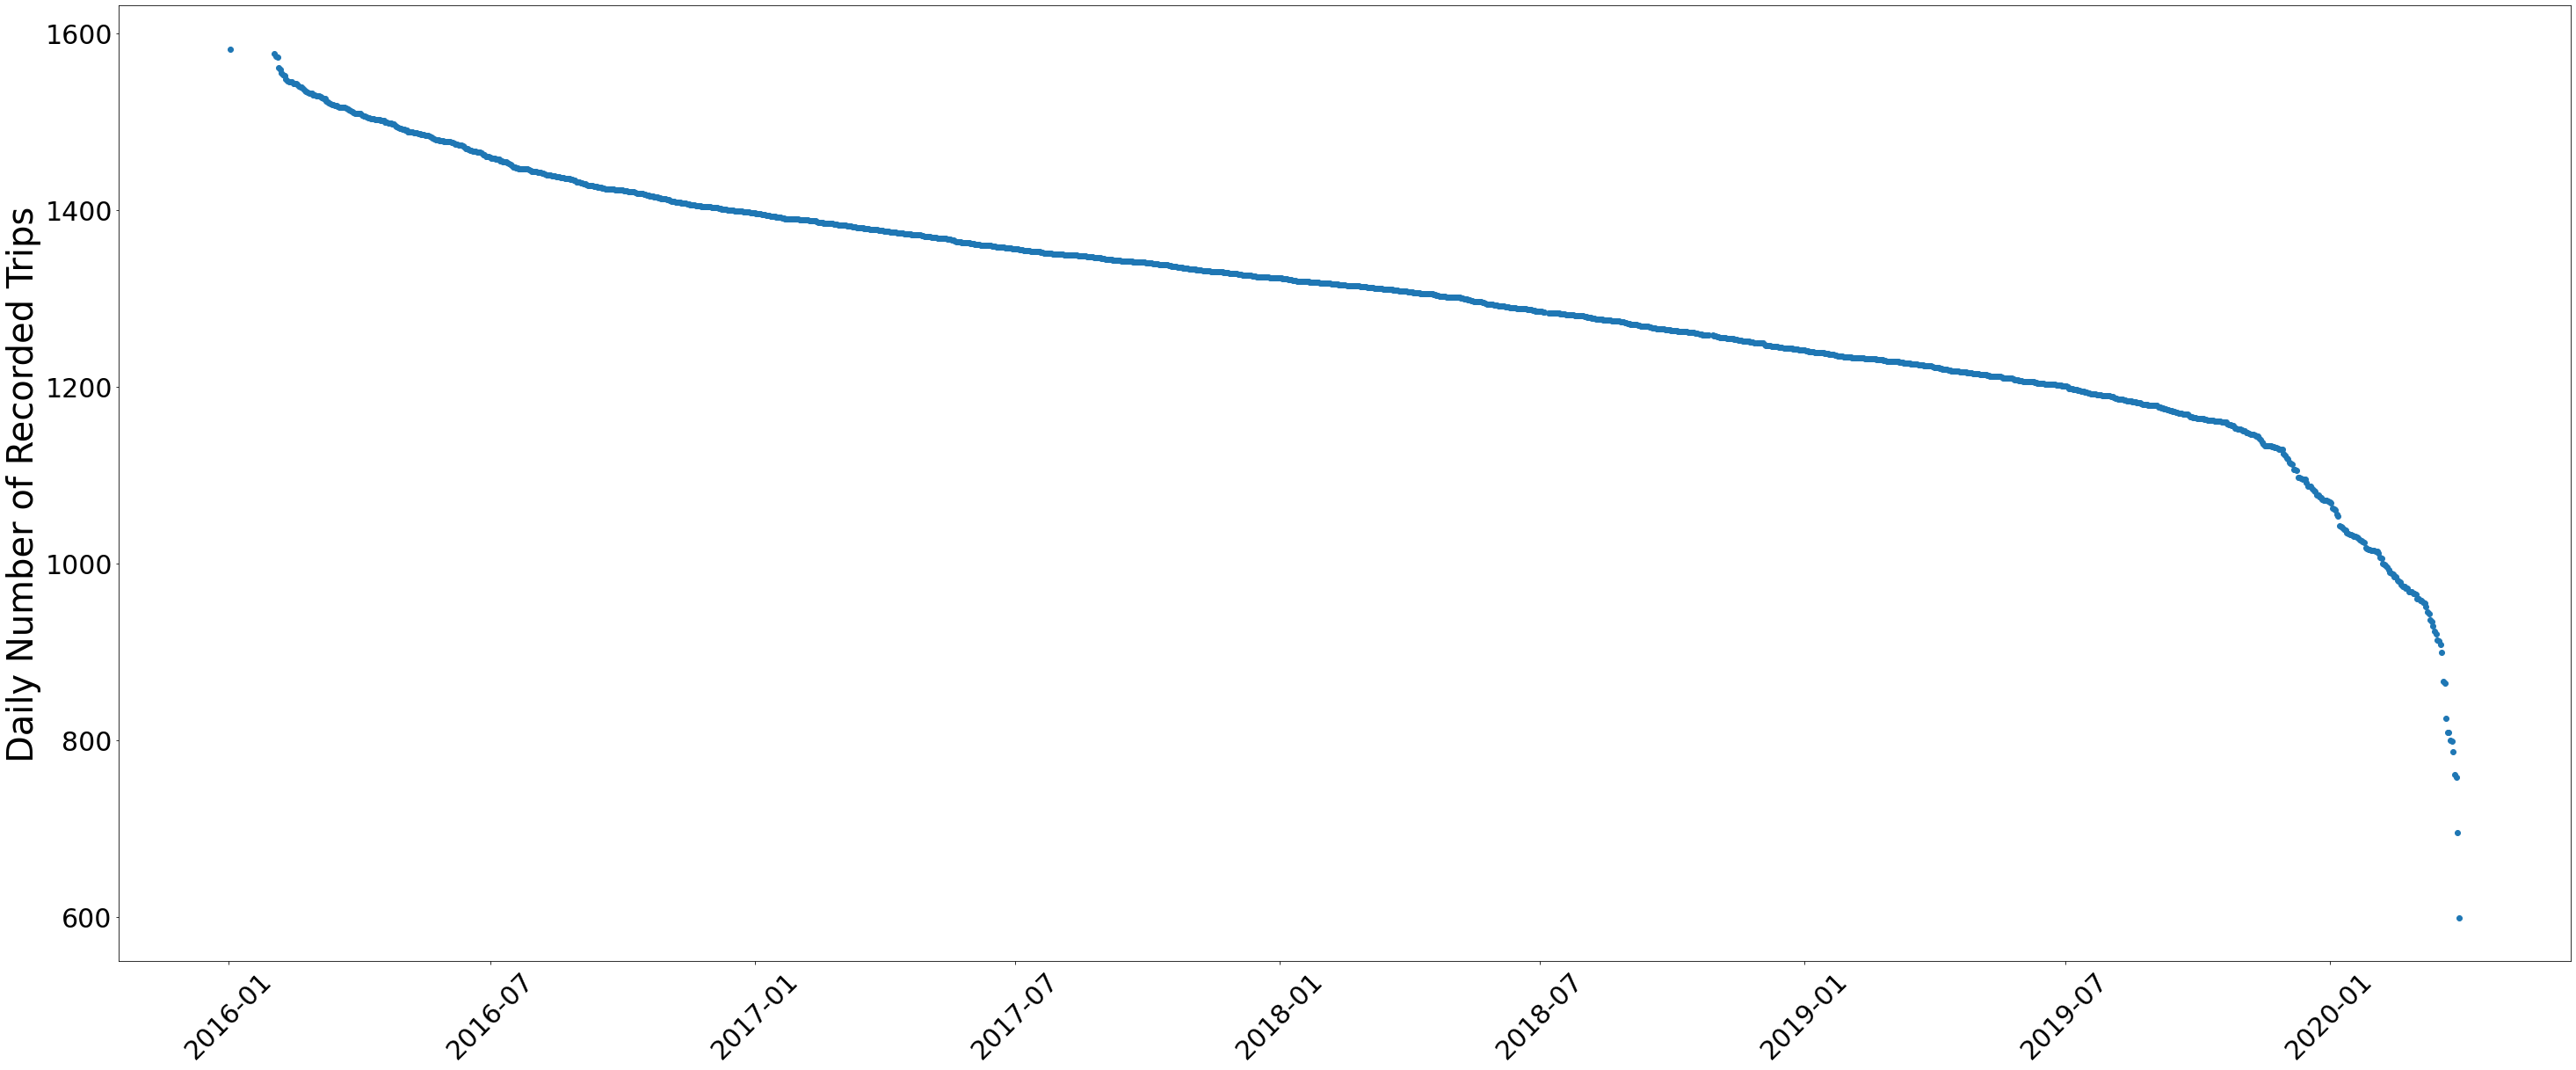

In [11]:
# Make sure that both of our axes have the same amount of datapoints
print(len(df['Date'].unique()))
print(len(df['Date'].value_counts()))

# Plot the distribution of amount of recorded daily trips (not based on time, but from day with highest amount
#     of recorded trips to day with least amount of recorded trips)
plt.figure(figsize=(50, 20))
plt.scatter(df['Date'].unique(), df['Date'].value_counts())
plt.xticks(fontsize=30, rotation=45)
plt.yticks(fontsize=30)
plt.xlabel("", fontsize=40)
plt.ylabel("Daily Number of Recorded Trips", fontsize=40)

Text(0, 0.5, 'Daily Number of Recorded Trips')

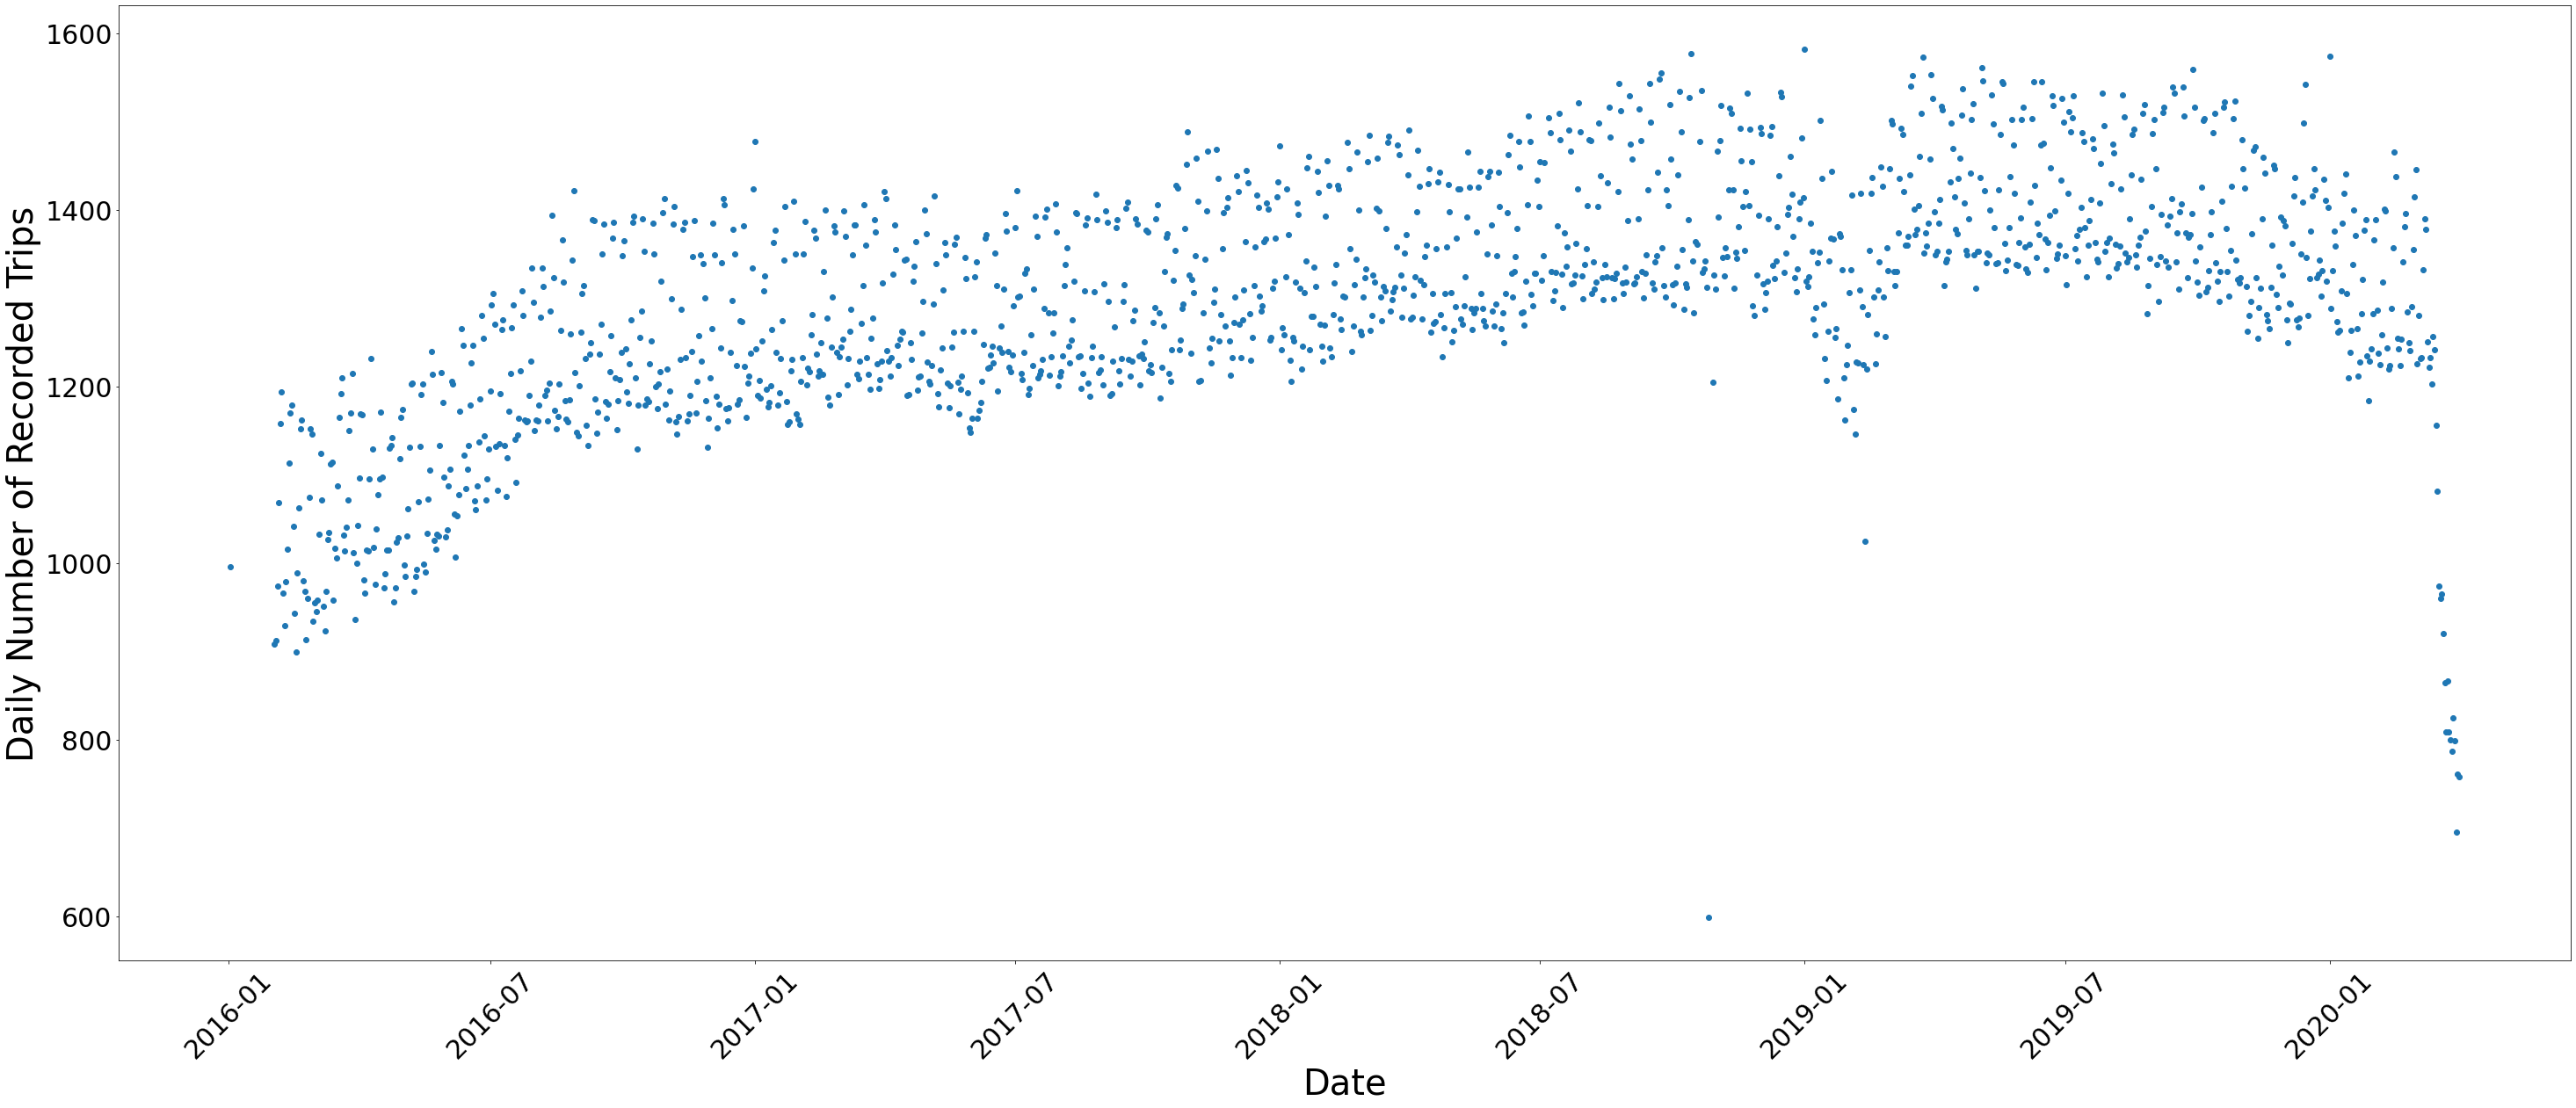

In [12]:
# Plotting the amount of recorded daily trips throught time
daily_trip_count = df.groupby('Date')['Mean Travel Time (Seconds)'].count()

plt.figure(figsize=(50,20))
plt.scatter(df['Date'].unique(), daily_trip_count)

# We change the fontsize of minor ticks label 
plt.xticks(fontsize=30, rotation=45)
plt.yticks(fontsize=30)
plt.xlabel("Date", fontsize=40)
plt.ylabel("Daily Number of Recorded Trips", fontsize=40)

In [13]:
df = df.rename(columns={"Mean Travel Time (Seconds)": "MeanTravelTimeSeconds"})

In [14]:
df.head()

Numeric Index Origin Movement ID Destination Movement ID       Date  \
995        1963661               1536                    2191 2016-01-02   
338        1963004               1536                     678 2016-01-02   
337        1963003               1536                     677 2016-01-02   
336        1963002               1536                     676 2016-01-02   
335        1963001               1536                     675 2016-01-02   

    MeanTravelTimeSeconds Range - Lower Bound Travel Time (Seconds)  \
995                  1832                                      1519   
338                   748                                       544   
337                   626                                       347   
336                  1129                                       750   
335                   910                                       605   

    Range - Upper Bound Travel Time (Seconds)  
995                                      2208  
338                                      1027  
337                                      1129  
336                                      1697  
335                                      1367

In [15]:
# Create a 'DayofWeek' column
df['DayOfWeek'] = df['Date'].dt.day_name()
df.head(548)

Numeric Index Origin Movement ID Destination Movement ID       Date  \
995        1963661               1536                    2191 2016-01-02   
338        1963004               1536                     678 2016-01-02   
337        1963003               1536                     677 2016-01-02   
336        1963002               1536                     676 2016-01-02   
335        1963001               1536                     675 2016-01-02   
..             ...                ...                     ...        ...   
855        1963521               1536                    1689 2016-01-02   
854        1963520               1536                    1688 2016-01-02   
853        1963519               1536                    1686 2016-01-02   
852        1963518               1536                    1684 2016-01-02   
851        1963517               1536                    1681 2016-01-02   

    MeanTravelTimeSeconds Range - Lower Bound Travel Time (Seconds)  \
995                  1832                                      1519   
338                   748                                       544   
337                   626                                       347   
336                  1129                                       750   
335                   910                                       605   
..                    ...                                       ...   
855                   667                                       612   
854                   728                                       570   
853                   669                                       462   
852                   669                                       528   
851                   852                                       619   

    Range - Upper Bound Travel Time (Seconds) DayOfWeek  
995                                      2208  Saturday  
338                                      1027  Saturday  
337                                      1129  Saturday  
336                                      1697  Saturday  
335                                      1367  Saturday  
..                                        ...       ...  
855                                       725  Saturday  
854                                       929  Saturday  
853                                       966  Saturday  
852                                       846  Saturday  
851                                      1171  Saturday  

[548 rows x 8 columns]

In [17]:
df.loc[df['Date'] == '2016-01-04'].count()

Numeric Index                                0
Origin Movement ID                           0
Destination Movement ID                      0
Date                                         0
MeanTravelTimeSeconds                        0
Range - Lower Bound Travel Time (Seconds)    0
Range - Upper Bound Travel Time (Seconds)    0
DayOfWeek                                    0
dtype: int64

In [18]:
# Removing sapces and odd character from column names
df = df.rename(columns={"Mean Travel Time (Seconds)": "MeanTravelTimeSeconds"})
df = df.rename(columns={"Numeric Index": "NumericIndex"})
df = df.rename(columns={"Origin Movement ID": "OriginMovementID"})
df = df.rename(columns={"Destination Movement ID": "DestinationMovementID"})
df = df.rename(columns={"Range - Lower Bound Travel Time (Seconds)": "RangeLowerBoundTravelTimeSeconds"})
df = df.rename(columns={"Range - Upper Bound Travel Time (Seconds)": "RangeUpperBoundTravelTimeSeconds"})

DayOfWeek
Friday       281499
Monday       269926
Saturday     304091
Sunday       301445
Thursday     273765
Tuesday      266354
Wednesday    266582
Name: MeanTravelTimeSeconds, dtype: int64


<BarContainer object of 7 artists>

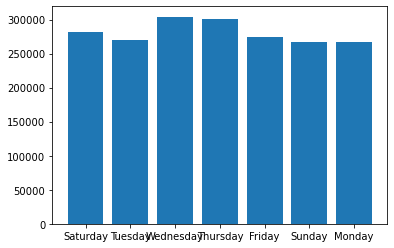

In [19]:
trip_count_DOW = df.groupby('DayOfWeek')['MeanTravelTimeSeconds'].count()
print(trip_count_DOW)

plt.bar(df['DayOfWeek'].unique(), trip_count_DOW)